In [21]:
import math
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
%matplotlib inline

random_seed = 30

In [22]:
data = pd.read_csv("../data/featured/data.csv", sep=';')

Xdata = data.drop('win', axis=1)
ydata = data.win

In [23]:
Xtrain, Xval, ytrain, yval = train_test_split(Xdata, ydata, test_size=0.4, random_state=random_seed)

In [24]:
clf = DecisionTreeClassifier(max_depth=15, random_state=random_seed)
clf.fit(Xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,30
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, clf.predict(Xtrain))))
print('accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, clf.predict(Xval))))

accuracy score (train): 1.000000
accuracy score (val): 0.588652


In [26]:
val_acc = []
train_acc = []
depths = range(1,101)
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state = random_seed)
    clf.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, clf.predict(Xval)))

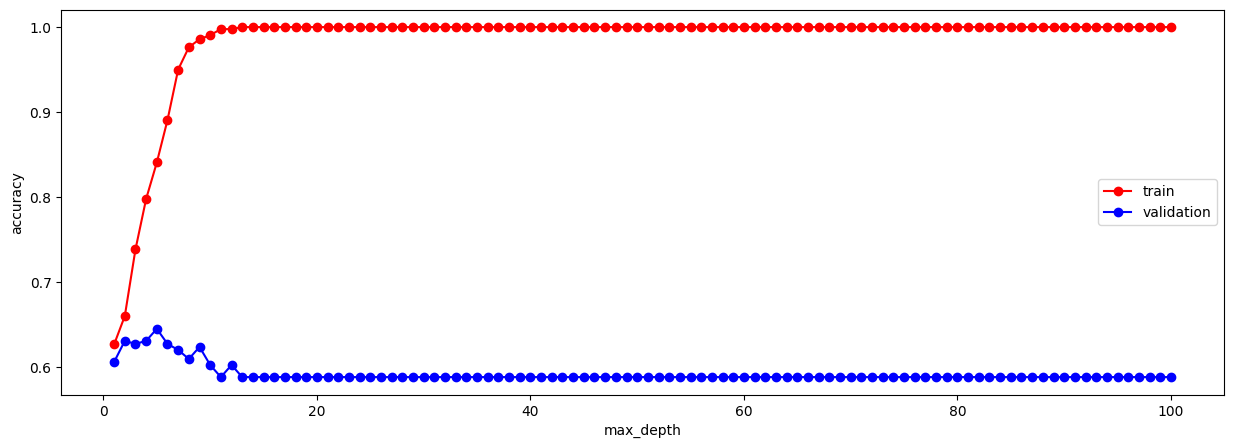

In [27]:
plt.figure(figsize=(15,5))
plt.plot(depths, train_acc,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(depths, val_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [28]:
optimal_depth = np.argmax(val_acc) + 1
print(f"optimal depth: {optimal_depth}")
clf = DecisionTreeClassifier(max_depth=optimal_depth, random_state = random_seed)
clf.fit(Xtrain, ytrain)

print('accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, clf.predict(Xval))))

optimal depth: 5
accuracy score (val): 0.645390


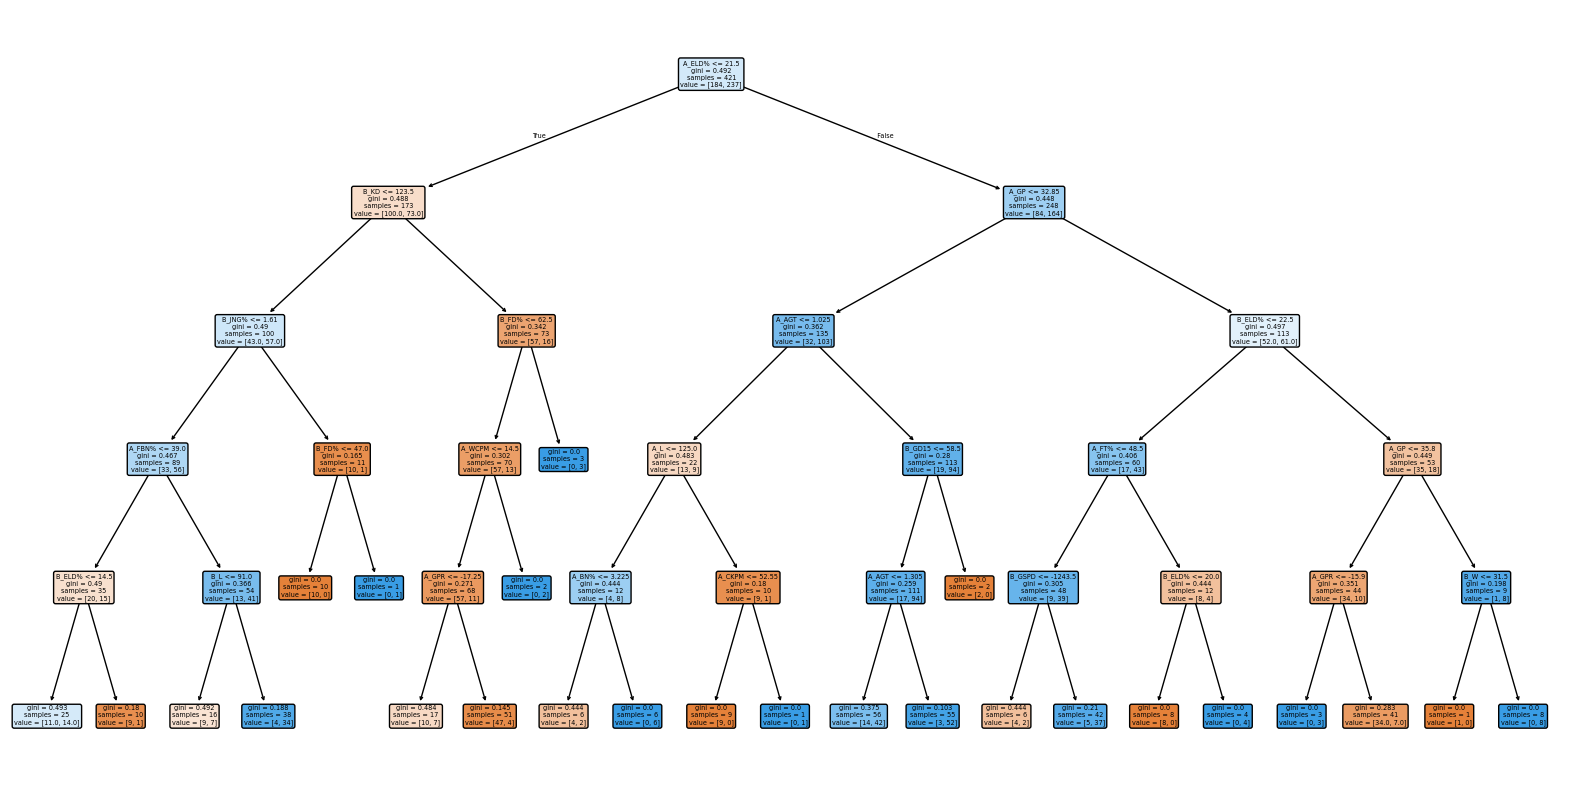

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt

feature_names = ["match_id","game_in_series","teamA","teamB","teamA_win","A_GP","A_W","A_L","A_AGT","A_K","A_D","A_KD","A_CKPM","A_GPR","A_GSPD","A_EGR","A_MLR","A_GD15","A_FB%","A_FT%","A_F3T%","A_PPG","A_HLD%","A_GRB%","A_FD%","A_DRG%","A_ELD%","A_FBN%","A_BN%","A_LNE%","A_JNG%","A_WPM","A_CWPM","A_WCPM","B_GP","B_W","B_L","B_AGT","B_K","B_D","B_KD","B_CKPM","B_GPR","B_GSPD","B_EGR","B_MLR","B_GD15","B_FB%","B_FT%","B_F3T%","B_PPG","B_HLD%","B_GRB%","B_FD%","B_DRG%","B_ELD%","B_FBN%","B_BN%","B_LNE%","B_JNG%","B_WPM","B_CWPM","B_WCPM","tournament","year","month","day"]


plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf,
    feature_names=feature_names,
    filled=True,
    rounded=True
)
plt.show()